In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
import pandas as pd

# Ignore all warnings
warnings.simplefilter('ignore')

In [3]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


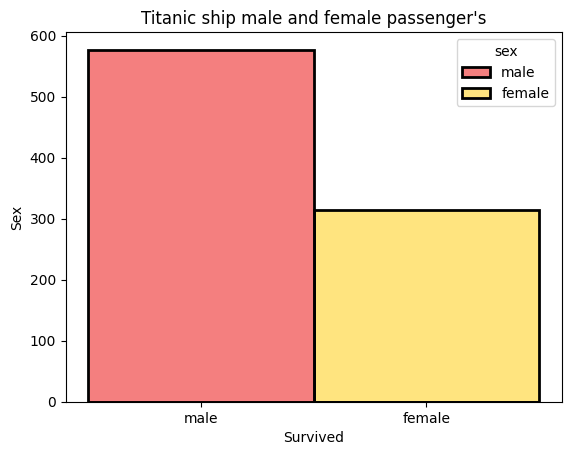

In [6]:
# titanic ship how many male and female passenger's 



sns.histplot(
    
   data = df,
    x = 'sex',
    palette = 'hot',
    hue = 'sex',
    linewidth = 2,
   
)
plt.title("Titanic ship male and female passenger's")
plt.xlabel('Survived')
plt.ylabel('Sex')
plt.show()

In [7]:

print('0 --> represents not survived')
print('1 --> represents survived')
print(df['survived'].value_counts()) 


0 --> represents not survived
1 --> represents survived
survived
0    549
1    342
Name: count, dtype: int64


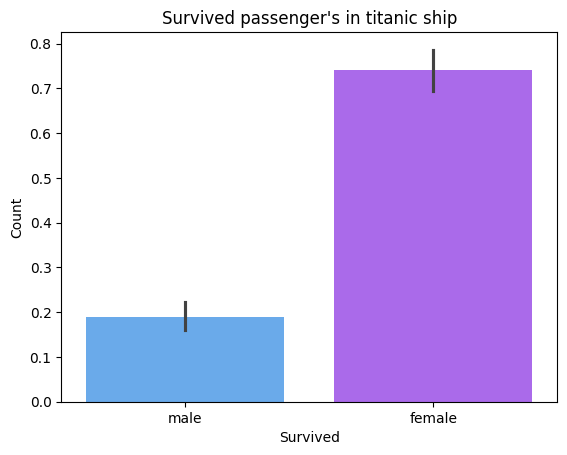

In [8]:
sns.barplot(
    data = df,
    x = 'sex',
    y = 'survived',
    palette = 'cool'
)


plt.title("Survived passenger's in titanic ship")
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

Survived Passengers 

In [9]:
result = df.pivot_table('survived', index = 'sex')
result



,survived
sex,
female,0.742038
male,0.188908


Class wise shaved passengers 


In [10]:
class_wise = df.pivot_table('survived', index = 'sex', columns = 'class')
class_wise

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


Based on age deference survived passengers 

In [11]:
diff_ages = pd.cut(df['age'],[0,18,80])
result = df.pivot_table('survived',['sex',diff_ages],'class')
result

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

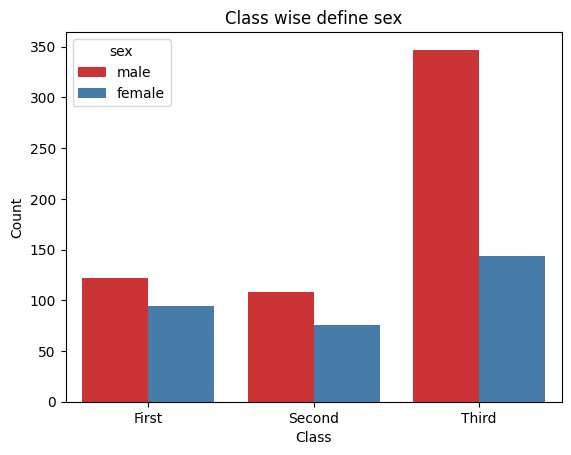

In [12]:
sns.countplot(
    data=df,
    x='class', 
    hue='sex',
    palette = 'Set1'
)

plt.title("Class wise define sex")
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

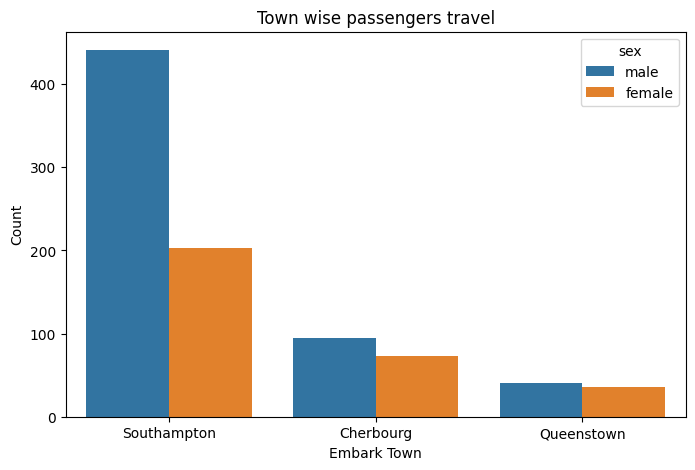

In [13]:
plt.figure(figsize=(8,5))

sns.countplot(

    data = df,
    x = 'embark_town',
    hue = 'sex'
)

plt.title("Town wise passengers travel")
plt.xlabel('Embark Town')
plt.ylabel('Count')
plt.show()

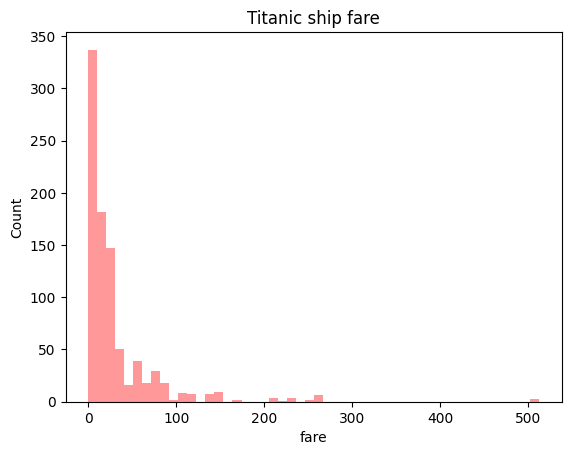

In [14]:
sns.distplot(

    df['fare'],
    color = 'r',
    kde = False
)
plt.title("Titanic ship fare")
plt.xlabel('fare')
plt.ylabel('Count')
plt.show()

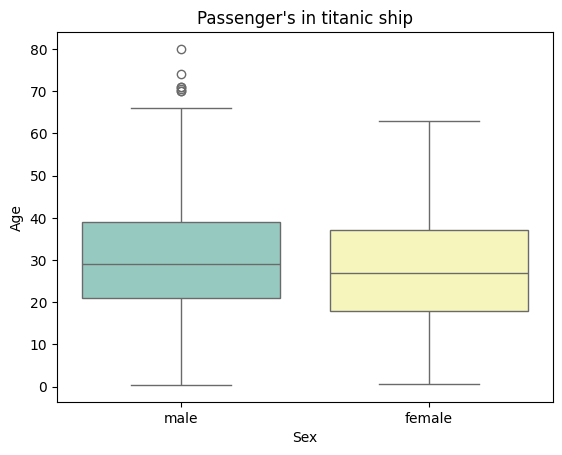

In [15]:
sns.boxplot(

    data = df,
    x = 'sex',
    y = 'age',
    palette = 'Set3'
)
plt.title("Passenger's in titanic ship")
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

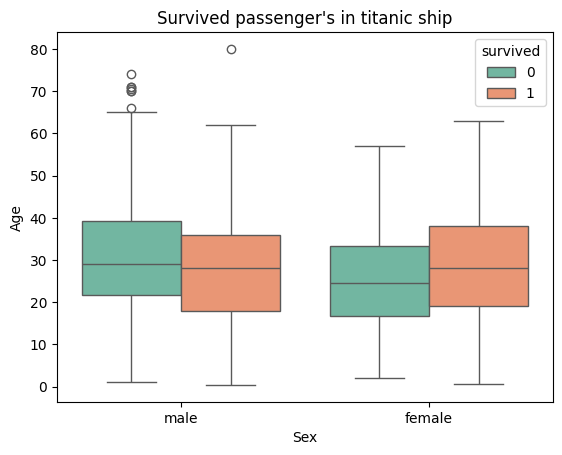

In [16]:
sns.boxplot(

    data = df,
    x = 'sex',
    y = 'age',
    palette = 'Set2',
    hue = 'survived'
)
plt.title("Survived passenger's in titanic ship")
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

Key Insights:
Class: First-class passengers had a higher survival rate than those in second and third classes.
Gender: Women had a higher chance of survival, reflecting societal norms at the time.
Age: Children had a better survival rate, as they were prioritized during evacuation.
Fare: Higher fare paid often correlated with better survival, likely due to class and proximity to lifeboats.